### Import libraries

In [87]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score,roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import torch
from sklearn import tree
import pickle
#import autosklearn.classification as classifier

In [2]:
print(torch.cuda.is_available())

True


### Load Dataset

In [3]:
df=pd.read_csv("D:/Machine Predictive Maintenance Classification Dataset/data/predictive_maintenance.csv")

In [4]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Data Profiling

In [5]:
df.shape

(10000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [8]:
total_types = df.shape[0]
low_types = df[df["Type"]=="L"].shape[0]
medium_types = df[df["Type"]=="M"].shape[0]
high_types = df[df["Type"]=="H"].shape[0]

# Calculate percentages
low_percentage = (low_types / total_types) * 100
medium_percentage = (medium_types / total_types) * 100
high_percentage = (high_types / total_types) * 100

print("Low%:",low_percentage)
print("Medium%:",medium_percentage)
print("High%:",high_percentage)

Low%: 60.0
Medium%: 29.970000000000002
High%: 10.03


In [9]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [11]:
independent_variables = df.columns[3:8]
independent_variables

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

In [12]:
dependent_variables = df.columns[8:]
dependent_variables

Index(['Target', 'Failure Type'], dtype='object')

In [13]:
independent_variables[0]

'Air temperature [K]'

In [14]:
df['Target'].unique()

array([0, 1])

In [15]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [16]:
for variable in dependent_variables:
    print(df[variable].value_counts())
    print("***"*8)

Target
0    9661
1     339
Name: count, dtype: int64
************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
************************


### Exploratory data analysis

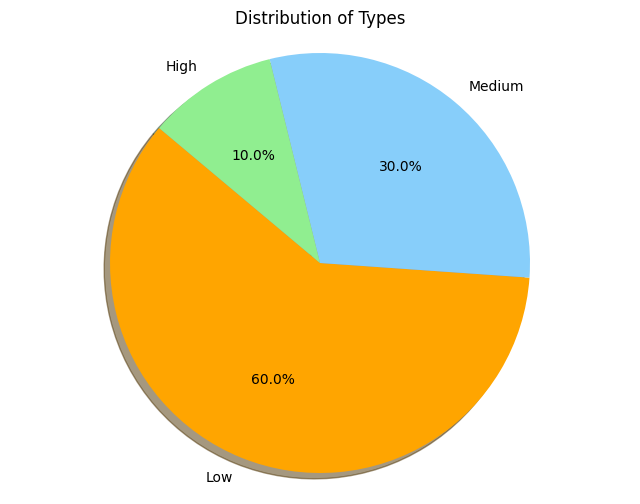

In [17]:
# Data to plot
sizes = [low_percentage, medium_percentage, high_percentage]
labels = ['Low', 'Medium', 'High']
colors = ['orange', 'lightskyblue', 'lightgreen']

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Types')

plt.show()


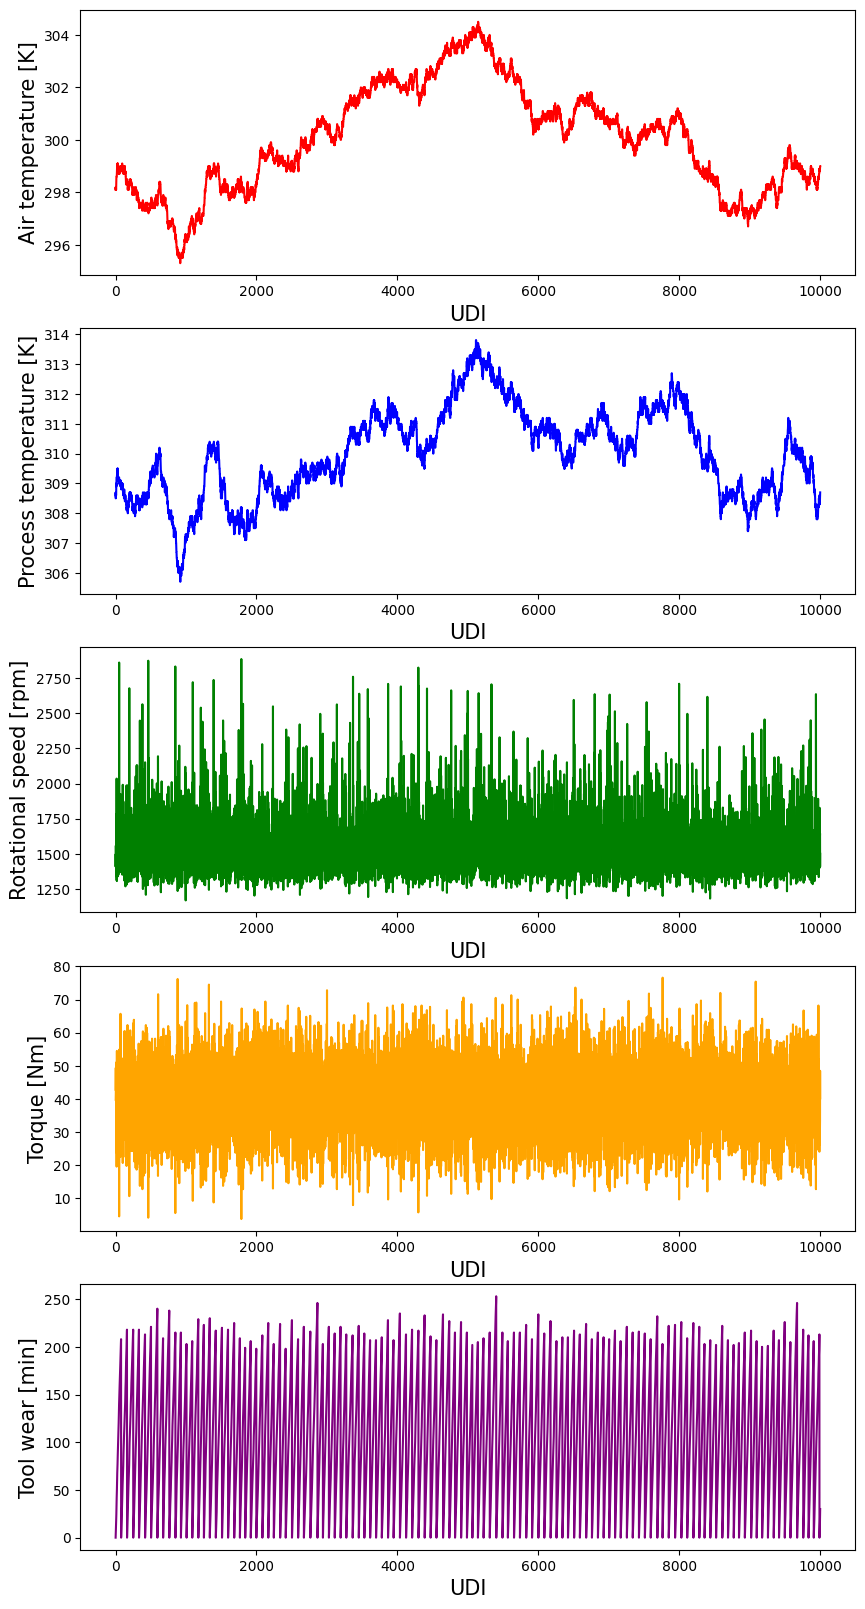

In [18]:
# Visualizing the trends of independent variables
fig, ax = plt.subplots(5,figsize=(10,20))
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(5):
    ax[i].plot(df["UDI"],df[independent_variables[i]],color=colors[i])
    ax[i].set_xlabel("UDI",fontsize=15)
    ax[i].set_ylabel(independent_variables[i],fontsize=15)
    # ax[i].legend(independent_variables[i])
plt.show()

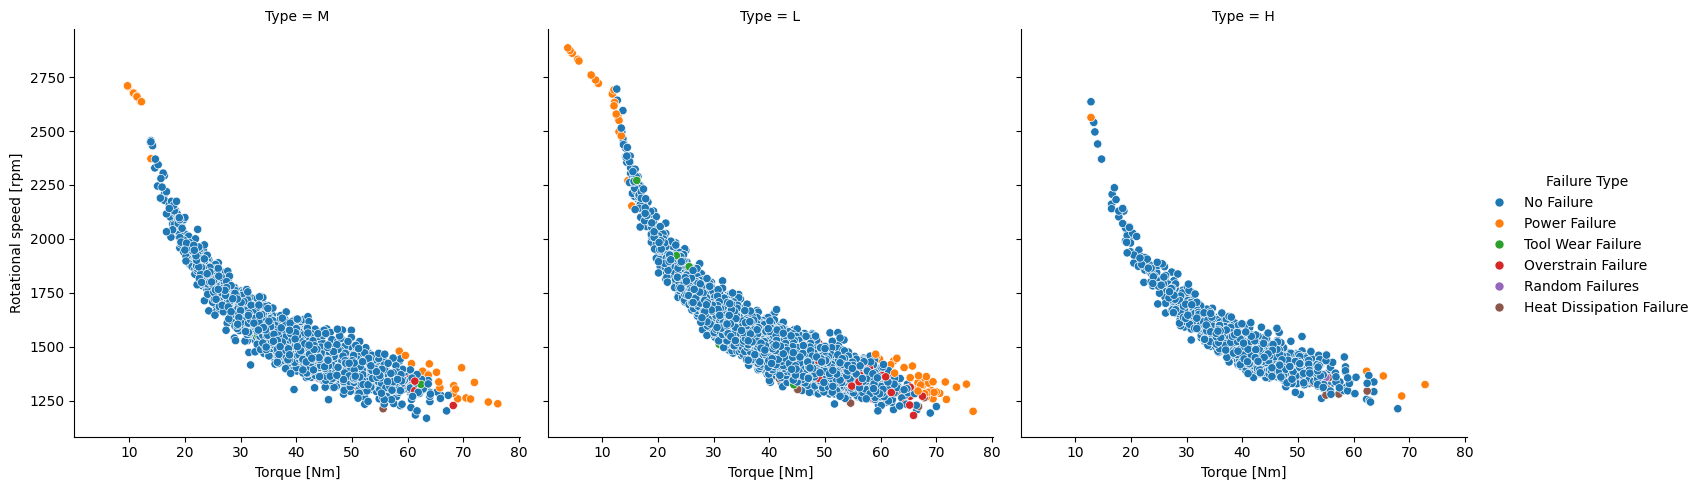

In [19]:
sns.relplot(data=df,x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", col="Type")

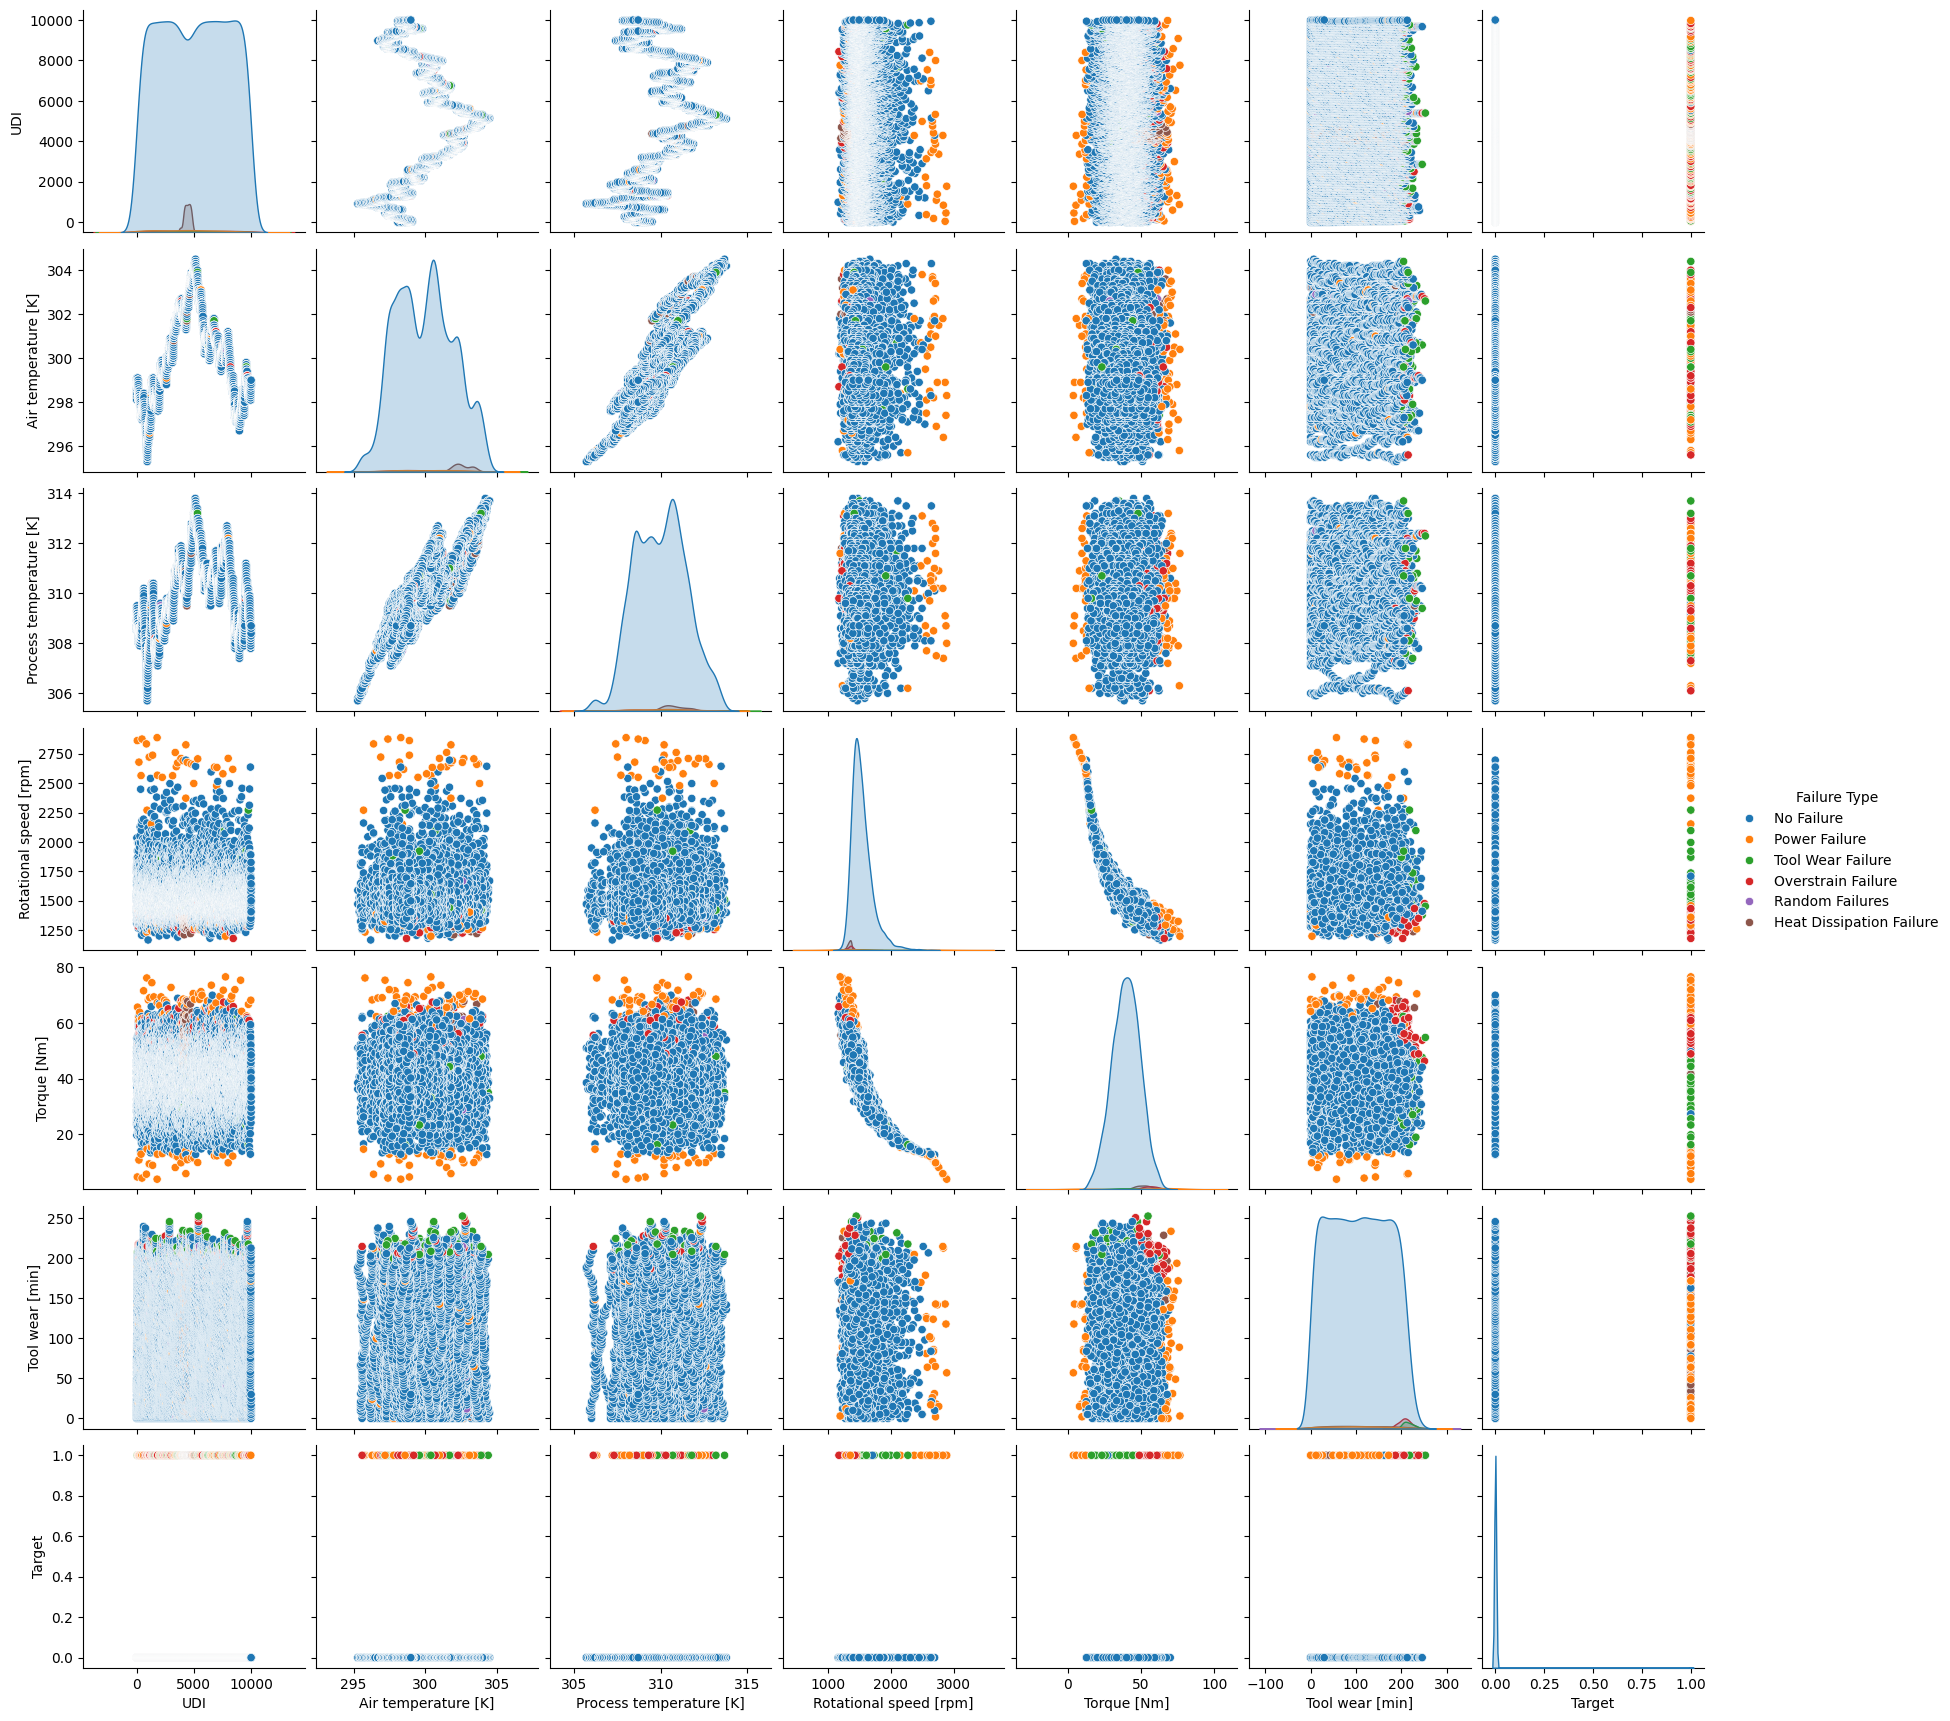

In [20]:
sns.pairplot(df,diag_kind='kde',hue='Failure Type') #it has histograms along the diagonal
                #scatterplots off the diagonal

### Data Preprocessing

In [22]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [23]:
new_data = df.copy()

# Transforming categorical values
scaler = LabelEncoder()
new_data['Type'] = scaler.fit_transform(new_data['Type'])
new_data['FailureType'] = scaler.fit_transform(new_data['Failure Type'])

new_data = new_data.drop(columns=['UDI','Product ID'],axis=1)
new_data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,FailureType
0,2,298.1,308.6,1551,42.8,0,0,No Failure,1
1,1,298.2,308.7,1408,46.3,3,0,No Failure,1
2,1,298.1,308.5,1498,49.4,5,0,No Failure,1
3,1,298.2,308.6,1433,39.5,7,0,No Failure,1
4,1,298.2,308.7,1408,40.0,9,0,No Failure,1
...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,1
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,1
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,1
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1


In [24]:
new_data[new_data['Target']==1]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,FailureType
50,1,298.9,309.1,2861,4.6,143,1,Power Failure,3
69,1,298.9,309.0,1410,65.7,191,1,Power Failure,3
77,1,298.8,308.9,1455,41.3,208,1,Tool Wear Failure,5
160,1,298.4,308.2,1282,60.7,216,1,Overstrain Failure,2
161,1,298.3,308.1,1412,52.3,218,1,Overstrain Failure,2
...,...,...,...,...,...,...,...,...,...
9758,1,298.6,309.8,2271,16.2,218,1,Tool Wear Failure,5
9764,1,298.5,309.5,1294,66.7,12,1,Power Failure,3
9822,1,298.5,309.4,1360,60.9,187,1,Overstrain Failure,2
9830,1,298.3,309.3,1337,56.1,206,1,Overstrain Failure,2


In [25]:
new_data[new_data['Target']==0]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,FailureType
0,2,298.1,308.6,1551,42.8,0,0,No Failure,1
1,1,298.2,308.7,1408,46.3,3,0,No Failure,1
2,1,298.1,308.5,1498,49.4,5,0,No Failure,1
3,1,298.2,308.6,1433,39.5,7,0,No Failure,1
4,1,298.2,308.7,1408,40.0,9,0,No Failure,1
...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,1
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,1
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,1
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1


In [26]:
new_data.columns=['Type','AirTemperature','ProcessTemperature','RotationalSpeed','Torque','ToolWear','Target','Failure Type','FailureType']
new_data

,Type,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear,Target,Failure Type,FailureType
0,2,298.1,308.6,1551,42.8,0,0,No Failure,1
1,1,298.2,308.7,1408,46.3,3,0,No Failure,1
2,1,298.1,308.5,1498,49.4,5,0,No Failure,1
3,1,298.2,308.6,1433,39.5,7,0,No Failure,1
4,1,298.2,308.7,1408,40.0,9,0,No Failure,1
...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,No Failure,1
9996,0,298.9,308.4,1632,31.8,17,0,No Failure,1
9997,2,299.0,308.6,1645,33.4,22,0,No Failure,1
9998,0,299.0,308.7,1408,48.5,25,0,No Failure,1


In [27]:
independent_variables=new_data.columns[1:6]
independent_variables

Index(['AirTemperature', 'ProcessTemperature', 'RotationalSpeed', 'Torque',
       'ToolWear'],
      dtype='object')

### Splitting of dataset

In [28]:
X = new_data[independent_variables]
X

,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [29]:
y = new_data['Target']
y.unique()

array([0, 1])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape, X_test.shape)

(7000, 5) (3000, 5)


### Fit and evaluate multiple classifiers using default settings (no hyperparameter tuning)

#### Logistic Regression

In [33]:
logistic_reg = LogisticRegression(random_state=1)
logistic_reg.fit(X_train,y_train)
y_pred_lr = logistic_reg.predict(X_test)

#Score returns the mean accuracy on the given test data and labels.
lr_train_accuracy = round(logistic_reg.score(X_train,y_train)*100,2)
lr_test_accuracy = round(accuracy_score(y_test,y_pred_lr)*100,2)
print("Logistic Regression Training Accuracy :",lr_train_accuracy,"%")
print("Logistic Regression Test Accuracy :",lr_test_accuracy,"%")

Logistic Regression Training Accuracy : 96.81 %
Logistic Regression Test Accuracy : 97.37 %


#### Decision Tree

In [34]:
decision_tree = DecisionTreeClassifier(random_state=1)

decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)

dt_train_accuracy = round(decision_tree.score(X_train, y_train) * 100, 2)
dt_test_accuracy = round(accuracy_score(y_test,y_pred_dt) * 100, 2)

print("Training Accuracy :",dt_train_accuracy ,"%")
print("Model Accuracy Score :",dt_test_accuracy ,"%")


Training Accuracy : 100.0 %
Model Accuracy Score : 97.73 %


#### Random Forest

In [35]:
random_forest = RandomForestClassifier(random_state=1)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

rf_train_accuracy= round(random_forest.score(X_train, y_train) * 100, 2)
rf_test_accuracy = round(accuracy_score(y_test,y_pred_rf) * 100, 2)

print("Training Accuracy :",rf_train_accuracy ,"%")
print("Model Accuracy Score :",rf_test_accuracy ,"%")

Training Accuracy : 100.0 %
Model Accuracy Score : 98.63 %


#### SVC

In [36]:
svc=SVC(random_state=1)
svc.fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)

svc_train_accuracy=round(svc.score(X_train, y_train) * 100, 2)
svc_test_accuracy=round(accuracy_score(y_test,y_pred_svc) * 100, 2)

print("Training Accuracy :",svc_train_accuracy ,"%")
print("Model Accuracy Score :",svc_test_accuracy ,"%")



Training Accuracy : 96.54 %
Model Accuracy Score : 96.93 %


#### Conclusion
Observing the accuracy of classifiers on training and testing datasets, it can be stated that Random forest and decision tree overfitted the data.

### Post pruning a decision tree

Since decision tree overfitted the data, implement post pruning step to observe whether it improves performance.
Refer the following link to read more about cost complexity pruning: [Link](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)

[Text(0.5, 0.9375, 'x[3] <= 64.95\ngini = 0.068\nsamples = 7000\nvalue = [6754, 246]'),
 Text(0.3333333333333333, 0.8125, 'x[3] <= 13.15\ngini = 0.058\nsamples = 6955\nvalue = [6746, 209]'),
 Text(0.41666666666666663, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'gini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.5, 0.6875, 'x[2] <= 1380.5\ngini = 0.053\nsamples = 6933\nvalue = [6744, 189]'),
 Text(0.3333333333333333, 0.5625, 'x[0] <= 301.55\ngini = 0.241\nsamples = 936\nvalue = [805, 131]'),
 Text(0.16666666666666666, 0.4375, 'gini = 0.106\nsamples = 698\nvalue = [659, 39]'),
 Text(0.5, 0.4375, 'x[1] <= 310.75\ngini = 0.474\nsamples = 238\nvalue = [146, 92]'),
 Text(0.3333333333333333, 0.3125, 'gini = 0.324\nsamples = 59\nvalue = [12, 47]'),
 Text(0.6666666666666666, 0.3125, 'x[1] <= 311.95\ngini = 0.376\nsamples = 179\nvalue = [134, 45]'),
 Text(0.5, 0.1875, 'x[0] <= 302.65\ngini = 0.465\nsamples = 109\nvalue = [69, 40]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.252\n

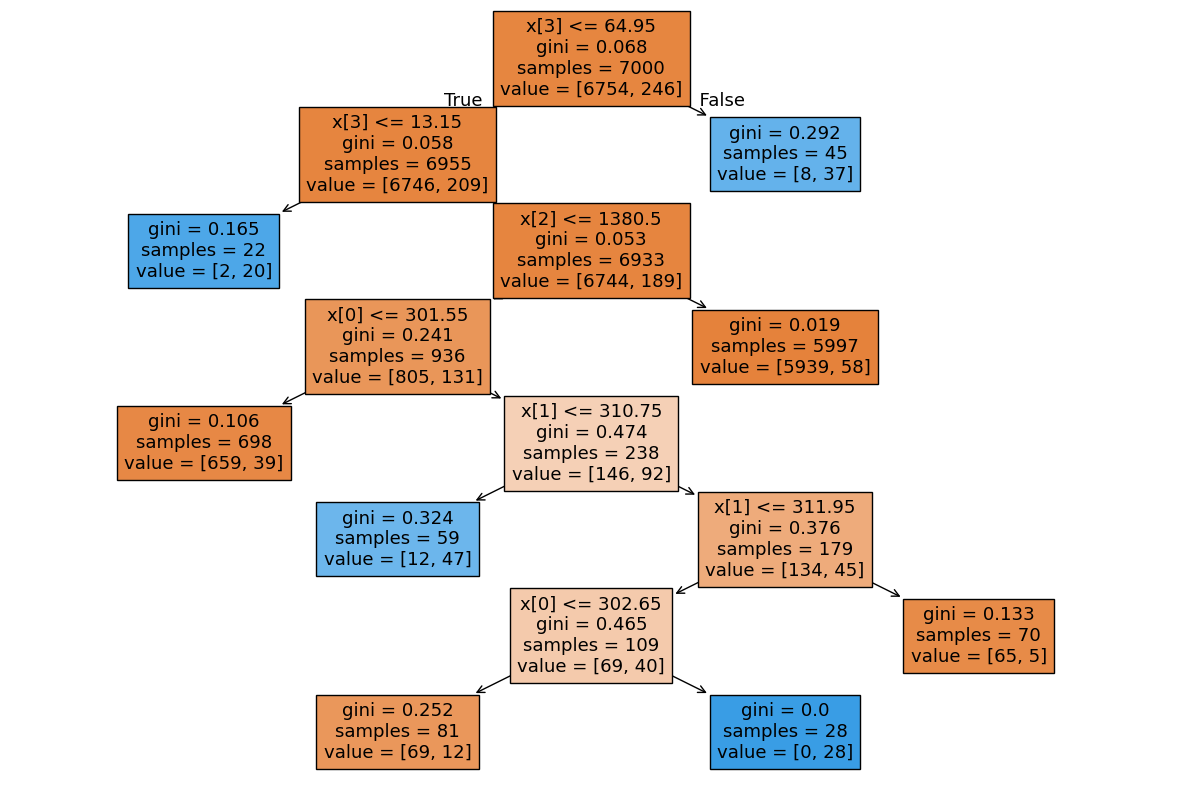

In [48]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True) # visualizing the full tree

# It can be seen that overfitting is caused due to formation of very complex tree.

In [39]:
path = decision_tree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.34653749e-05, 7.13206733e-05, 7.13864348e-05,
       9.28571429e-05, 9.50879665e-05, 9.52380952e-05, 1.27819549e-04,
       1.30032468e-04, 1.34693878e-04, 1.34920635e-04, 1.36054422e-04,
       1.39097744e-04, 1.39455782e-04, 1.40306122e-04, 1.41071429e-04,
       1.42610837e-04, 1.42857143e-04, 1.48194662e-04, 1.70371873e-04,
       1.71428571e-04, 1.71428571e-04, 1.80662903e-04, 1.90067254e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       1.90476190e-04, 1.90476190e-04, 1.96188911e-04, 2.14285714e-04,
       2.38095238e-04, 2.44229267e-04, 2.47371676e-04, 2.48889697e-04,
       2.50000000e-04, 2.57142857e-04, 2.62434482e-04, 2.63736264e-04,
       2.76785714e-04, 3.29670330e-04, 3.71594363e-04, 3.78339277e-04,
       3.86479592e-04, 3.97402597e-04, 3.99350649e-04, 4.35374150e-04,
       4.46428571e-04, 4.50258736e-04, 4.83340483e-04, 5.16025641e-04,
       5.57743168e-04, 5.68203602e-04, 5.71428571e-04, 6.15029212e-04,
      

In [ ]:
# Fit decision tree for each ccp_alpha

dts = []
for ccp_alpha in ccp_alphas:
    decision_tree = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    decision_tree.fit(X_train,y_train)
    dts.append(decision_tree)

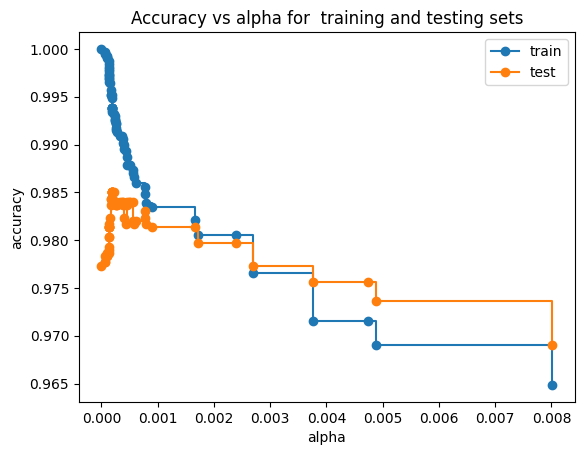

In [ ]:
# calulate and plot the accuracy over training and testing dataset for each fitted decision tree
# find the optimal ccp_alpha from the plot

train_scores = [decision_tree.score(X_train,y_train) for decision_tree in dts]
test_scores = [decision_tree.score(X_test,y_test) for decision_tree in dts]

fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for  training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [ ]:
# Selected optimal value of 0.0025 of ccp_alpha
# It can be observed that overfitting decreased.

decision_tree = DecisionTreeClassifier(random_state=1,ccp_alpha=0.0025)
decision_tree.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)

dt_train_accuracy = round(decision_tree.score(X_train, y_train) * 100, 2)
dt_test_accuracy = round(accuracy_score(y_test,y_pred_dt) * 100, 2)

print("Training Accuracy :",dt_train_accuracy ,"%")
print("Model Accuracy Score :",dt_test_accuracy ,"%")


Training Accuracy : 98.06 %
Model Accuracy Score : 97.97 %


[Text(0.5, 0.9375, 'x[3] <= 64.95\ngini = 0.068\nsamples = 7000\nvalue = [6754, 246]'),
 Text(0.3333333333333333, 0.8125, 'x[3] <= 13.15\ngini = 0.058\nsamples = 6955\nvalue = [6746, 209]'),
 Text(0.41666666666666663, 0.875, 'True  '),
 Text(0.16666666666666666, 0.6875, 'gini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.5, 0.6875, 'x[2] <= 1380.5\ngini = 0.053\nsamples = 6933\nvalue = [6744, 189]'),
 Text(0.3333333333333333, 0.5625, 'x[0] <= 301.55\ngini = 0.241\nsamples = 936\nvalue = [805, 131]'),
 Text(0.16666666666666666, 0.4375, 'gini = 0.106\nsamples = 698\nvalue = [659, 39]'),
 Text(0.5, 0.4375, 'x[1] <= 310.75\ngini = 0.474\nsamples = 238\nvalue = [146, 92]'),
 Text(0.3333333333333333, 0.3125, 'gini = 0.324\nsamples = 59\nvalue = [12, 47]'),
 Text(0.6666666666666666, 0.3125, 'x[1] <= 311.95\ngini = 0.376\nsamples = 179\nvalue = [134, 45]'),
 Text(0.5, 0.1875, 'x[0] <= 302.65\ngini = 0.465\nsamples = 109\nvalue = [69, 40]'),
 Text(0.3333333333333333, 0.0625, 'gini = 0.252\n

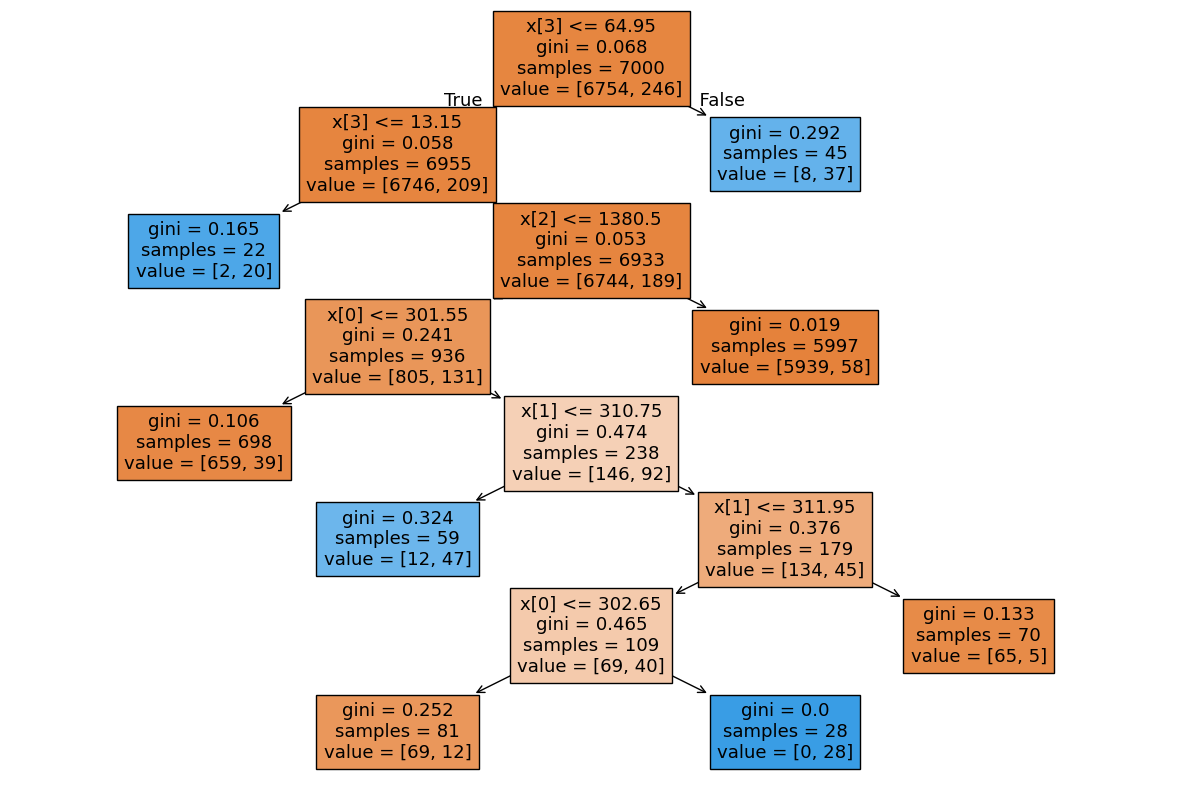

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True) # visualizing the tree

### Run GridSearchCV for hyperparameter tuning for each above classifier; cache results to avoid re-computation


In [41]:
# Define model parameters
model_params = {
    'dt':{'model':DecisionTreeClassifier(criterion='gini',random_state=1,ccp_alpha=0.0015),
          'params':{'max_depth':[5,6,7,8,10,20,30,50],'min_samples_split':[50,100,200],'min_samples_leaf':[50,100,200]}
          },
    'svc': {'model': SVC(gamma='auto',random_state=1),
        'params': {'C': [1, 10, 20], 'kernel': ['rbf']}
            },
    'random_forest': {'model': RandomForestClassifier(criterion='gini',random_state=1),
        'params': {'n_estimators': [10, 50, 100],'max_depth':[8,10,20,30,50],'min_samples_split':[50,100,200],'min_samples_leaf':[50,100,200]}
            },
    'logistic_regression': {'model': LogisticRegression(penalty='l2',random_state=1),
        'params': {'C': [1, 5, 10]}
            }
}

# Perform grid search and store results
scores_bnry = []
for model_name, mp in model_params.items():
    print(model_name)
    print(mp)
    classifier = GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=True) #this will create a GridSearchCV object
    classifier.fit(X.values, y.values) #This will fit the GridSearchCV on the whole data, but during fitting cross-validation will be 
                                       #performed on the training data to tune the hyperparameters and select the best model.
    scores_bnry.append({
        'model': model_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_,
        'mean_train_score': np.mean(classifier.cv_results_['mean_train_score']),
            })
    print(scores_bnry)

# Create DataFrame from scores
df = pd.DataFrame(scores_bnry, columns=['model', 'best_score', 'best_params', 'mean_train_score'])

# Print the results
df


dt
{'model': DecisionTreeClassifier(ccp_alpha=0.0015, random_state=1), 'params': {'max_depth': [5, 6, 7, 8, 10, 20, 30, 50], 'min_samples_split': [50, 100, 200], 'min_samples_leaf': [50, 100, 200]}}
[{'model': 'dt', 'best_score': 0.9686, 'best_params': {'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 50}, 'mean_train_score': 0.9701106481481483}]
svc
{'model': SVC(gamma='auto', random_state=1), 'params': {'C': [1, 10, 20], 'kernel': ['rbf']}}
[{'model': 'dt', 'best_score': 0.9686, 'best_params': {'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 50}, 'mean_train_score': 0.9701106481481483}, {'model': 'svc', 'best_score': 0.9660999999999997, 'best_params': {'C': 1, 'kernel': 'rbf'}, 'mean_train_score': 0.9993296296296297}]
random_forest
{'model': RandomForestClassifier(random_state=1), 'params': {'n_estimators': [10, 50, 100], 'max_depth': [8, 10, 20, 30, 50], 'min_samples_split': [50, 100, 200], 'min_samples_leaf': [50, 100, 200]}}
[{'model': 'dt', 'best_score': 

,model,best_score,best_params,mean_train_score
0,dt,0.9686,"{'max_depth': 6, 'min_samples_leaf': 50, 'min_...",0.970111
1,svc,0.9661,"{'C': 1, 'kernel': 'rbf'}",0.999330
2,random_forest,0.9679,"{'max_depth': 8, 'min_samples_leaf': 50, 'min_...",0.967170
3,logistic_regression,0.9684,{'C': 1},0.970319


In [42]:
%store scores_bnry

Stored 'scores_bnry' (list)


### Instantiate classifiers using optimal hyperparameters selected via GridSearchCV

In [45]:
%store -r scores_bnry


In [46]:
scores_bnry[0]['best_params']

{'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [51]:
scores_bnry[2]['best_params']['n_estimators'],

(100,)

In [52]:
decision_tree_binary_clf = DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.0015, random_state = 1, 
                                                  max_depth = scores_bnry[0]['best_params']['max_depth'],
                                                  min_samples_leaf = scores_bnry[0]['best_params']['min_samples_leaf'],
                                                  min_samples_split = scores_bnry[0]['best_params']['min_samples_split'])

svc_binary_clf = SVC(gamma ='auto', random_state = 1, C = scores_bnry[1]['best_params']['C'], 
                     kernel = scores_bnry[1]['best_params']['kernel'], class_weight = 'balanced')

random_forest_binary_clf = RandomForestClassifier(criterion ='gini', random_state = 1, 
                                                  max_depth = scores_bnry[2]['best_params']['max_depth'],
                                                  n_estimators = scores_bnry[2]['best_params']['n_estimators'],
                                                  min_samples_leaf = scores_bnry[2]['best_params']['min_samples_leaf'],
                                                  min_samples_split = scores_bnry[2]['best_params']['min_samples_split'],
                                                  bootstrap = True, class_weight = 'balanced_subsample')

logistic_reg_binary_clf = LogisticRegression(penalty = 'l2', random_state = 1, 
                                             C=scores_bnry[3]['best_params']['C'], class_weight='balanced')

### Using Stratified K-Fold Cross Validation for evaluating the models after initializing them with best hyperparameters chosen set
We have selected the hyperparameter configuration of four classifiers. Now, it's time to pick the best out of them. So we will be evaluating model's performance using cross validation.
Links to learn about cross validation: [Link 1](https://www.youtube.com/watch?v=gJo0uNL-5Qw&t=1282s), [Link 2](https://www.youtube.com/watch?v=PF2wLKv2lsI)

In [53]:
def get_score(model, stratified_kfold):
    
    cv_results = cross_validate(model, X, y, cv=stratified_kfold, return_train_score=True)

    print("****" * 4)
    print(model)
    print('Train Scores:', cv_results['train_score'])
    print('Test Scores:', cv_results['test_score'])
    print('Average Train Accuracy:', np.mean(cv_results['train_score']))
    print('Average Test Accuracy:', np.mean(cv_results['test_score']))
    print("****" * 4)

models=[svc_binary_clf, logistic_reg_binary_clf, decision_tree_binary_clf, random_forest_binary_clf]
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model in models:
    get_score(model, stratified_kfold)

****************
SVC(C=1, class_weight='balanced', gamma='auto', random_state=1)
Train Scores: [0.99977778 0.99977778 0.99966667 0.99966667 0.99977778 0.99966667
 0.99977778 0.99966667 0.99977778 0.99966667]
Test Scores: [0.966 0.966 0.966 0.966 0.966 0.965 0.965 0.966 0.966 0.966]
Average Train Accuracy: 0.9997222222222222
Average Test Accuracy: 0.9658
****************
****************
LogisticRegression(C=1, class_weight='balanced', random_state=1)
Train Scores: [0.82344444 0.81877778 0.82433333 0.81744444 0.82077778 0.82155556
 0.82066667 0.81677778 0.82377778 0.81777778]
Test Scores: [0.814 0.826 0.813 0.837 0.819 0.793 0.816 0.831 0.829 0.835]
Average Train Accuracy: 0.8205333333333333
Average Test Accuracy: 0.8212999999999999
****************
****************
DecisionTreeClassifier(ccp_alpha=0.0015, max_depth=6, min_samples_leaf=50,
                       min_samples_split=50, random_state=1)
Train Scores: [0.97455556 0.97511111 0.97366667 0.97722222 0.97633333 0.97744444
 0.9761

#### Conclusion
Decision tree and Random Forest classifiers seem to be perfoming consistently well over both training and testing datsets. SVC shows indication of overfitting.

In [48]:
#Comment: This code section was written to try somethind, but this cannot be used to train the model and dump it to pickle file

# stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# # Perform stratified K-Fold cross-validation
# for fold, (train_idx, valid_idx) in enumerate(stratified_kfold.split(X, y)):
#     print(X)
#     X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
#     X_valid, y_valid = X.iloc[valid_idx], y.iloc[valid_idx]

#     # Train 
#     random_forest_binary_clf.fit(X_train, y_train)

#     # Evaluate 
#     accuracy = random_forest_binary_clf.score(X_valid, y_valid)
#     print(f"Fold {fold+1}: Validation Accuracy = {accuracy:.4f}")



### Gradient boosted classifiers: XGBoost

#### Fit and evaluate Xgboost with default/random hyperparameters

In [54]:
xgboost_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
xgboost_clf.score(X_test, y_test)

0.9723333333333334

#### Fine tune Xgboost classifier

In [50]:
# Define model parameters
model_params = {
    'xgboost':{'model':GradientBoostingClassifier(random_state=1),
          'params':{'max_depth':[5,6,7,8,10,20,30,50],'n_estimators':[10,30,50,80,100,200],'learning_rate':[0.1,0.2,0.5,0.6,0.8]}
          }
}

# Perform grid search and store results
scores_bnry_xgboost = []
for model_name, mp in model_params.items():
    print(model_name)
    print(mp)
    classifier = GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=True) #this will create a GridSearchCV object
    classifier.fit(X.values, y.values) #This will fit the GridSearchCV on the whole data, but during fitting cross-validation will be 
                                       #performed on the training data to tune the hyperparameters and select the best model.
    scores_bnry_xgboost.append({
        'model': model_name,
        'best_score': classifier.best_score_,
        'best_params': classifier.best_params_,
        'mean_train_score': np.mean(classifier.cv_results_['mean_train_score']),
            })
    print(scores_bnry_xgboost)

# Create DataFrame from scores
df_xgboost = pd.DataFrame(scores_bnry_xgboost, columns=['model', 'best_score', 'best_params', 'mean_train_score'])

# Print the results
df_xgboost


xgboost
{'model': GradientBoostingClassifier(random_state=1), 'params': {'max_depth': [5, 6, 7, 8, 10, 20, 30, 50], 'n_estimators': [10, 30, 50, 80, 100, 200], 'learning_rate': [0.1, 0.2, 0.5, 0.6, 0.8]}}
[{'model': 'xgboost', 'best_score': 0.9767999999999999, 'best_params': {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 10}, 'mean_train_score': 0.9979280555555554}]


,model,best_score,best_params,mean_train_score
0,xgboost,0.9768,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.997928


In [51]:
%store scores_bnry_xgboost

Stored 'scores_bnry_xgboost' (list)


In [52]:
scores_bnry_xgboost[0]['best_params']

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 10}

#### Initialize the model with best hyperparamters

In [55]:
%store -r scores_bnry_xgboost

In [56]:
xgboost_binary_clf=GradientBoostingClassifier(random_state=1,max_depth=scores_bnry_xgboost[0]['best_params']['max_depth'],
                                              learning_rate=scores_bnry_xgboost[0]['best_params']['learning_rate'],
                                              n_estimators=scores_bnry_xgboost[0]['best_params']['n_estimators'])

#### Model evaluation using stratified-kfold technique

In [57]:
def get_score(model,stratified_kfold):
    cv_results = cross_validate(model, X, y, cv=stratified_kfold, return_train_score=True)

    print("****" * 4)
    print(model)
    print('Train Scores:', cv_results['train_score'])
    print('Test Scores:', cv_results['test_score'])
    print('Average Train Accuracy:', np.mean(cv_results['train_score']))
    print('Average Test Accuracy:', np.mean(cv_results['test_score']))
    print("****" * 4)

models=[xgboost_binary_clf]
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for model in models:
    get_score(model,stratified_kfold)

****************
GradientBoostingClassifier(max_depth=7, n_estimators=10, random_state=1)
Train Scores: [0.99011111 0.99155556 0.99277778 0.98955556 0.98944444 0.99077778
 0.98955556 0.991      0.992      0.99288889]
Test Scores: [0.98  0.982 0.987 0.987 0.975 0.979 0.981 0.987 0.975 0.983]
Average Train Accuracy: 0.9909666666666667
Average Test Accuracy: 0.9816
****************


#### Fitting and evaluating the model

In [58]:
xgboost_binary_clf.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=10, random_state=1)

In [59]:
y_pred=xgboost_binary_clf.predict(X_test)
y_pred_df = pd.DataFrame({'Predicted': y_pred})

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)  # Assuming X_test is a DataFrame

#X_test_df.info()
#y_pred_df.info()

# Concatenate y_pred_df and X_test_df along the columns
X_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
result_df = pd.concat([X_test_df, y_pred_df], axis=1)

#result_df
result_df[result_df['Predicted']==1].shape

(60, 6)

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp )
#out of 93 one's (not a failure) (fn+tp) only 51 predicted are correct
#out of 2907 zero's (failure)(tn+fp) 2898 are predicted correct

(np.int64(2898), np.int64(9), np.int64(42), np.int64(51))

In [62]:
f1_score(y_test,y_pred)

0.6666666666666666

In [63]:
precision_score(y_test,y_pred)

0.85

In [64]:
recall_score(y_test,y_pred)

0.5483870967741935

### Evaluate all classifiers using classification measures

#### Random Forest

In [65]:
random_forest_binary_clf

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=1)

In [66]:
random_forest_binary_clf.fit(X_train,y_train)
y_pred=random_forest_binary_clf.predict(X_test)
y_pred_df = pd.DataFrame({'Predicted': y_pred})

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)  # Assuming X_test is a DataFrame

#X_test_df.info()
#y_pred_df.info()

# Concatenate y_pred_df and X_test_df along the columns
X_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
result_df = pd.concat([X_test_df, y_pred_df], axis=1)

#result_df
result_df[result_df['Predicted']==1].shape

(386, 6)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp )
#out of 93 one's (not a failure) (fn+tp) only 89 predicted are correct
#out of 2907 zero's (failure)(tn+fp) 2610 are predicted correct

(np.int64(2610), np.int64(297), np.int64(4), np.int64(89))

In [68]:
f1_score(y_test,y_pred)

0.37160751565762007

In [ ]:
recall_score(y_test,y_pred)  # tp/tp+fn; means model is able to recall "not a failure" instances

0.956989247311828

In [ ]:
precision_score(y_test,y_pred) # tp/tp+fp; accuracy of positive predictions

0.23056994818652848

#### Decision Tree

In [71]:
decision_tree_binary_clf

DecisionTreeClassifier(ccp_alpha=0.0015, max_depth=6, min_samples_leaf=50,
                       min_samples_split=50, random_state=1)

In [72]:
decision_tree_binary_clf.fit(X_train,y_train)
#y_pred=decision_tree_binary_clf.predict(scaler.inverse_transform(X_test))
y_pred=decision_tree_binary_clf.predict(X_test)
y_pred_df = pd.DataFrame({'Predicted': y_pred})

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)  # Assuming X_test is a DataFrame

# Concatenate y_pred_df and X_test_df along the columns
X_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
result_df = pd.concat([X_test_df, y_pred_df], axis=1)
result_df[result_df['Predicted']==1].shape

(52, 6)

In [73]:
tn, fp, fn, tp=confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp )
#out of 93 one's (not a failure) (fn+tp) only 37 predicted are correct
#out of 2907 zero's (failure)(tn+fp) 2892 are predicted correct

(np.int64(2892), np.int64(15), np.int64(56), np.int64(37))

In [74]:
f1_score(y_test,y_pred)

0.5103448275862069

In [75]:
recall_score(y_test,y_pred)

0.3978494623655914

In [76]:
precision_score(y_test,y_pred)

0.7115384615384616

#### SVC

In [77]:
svc_binary_clf.fit(X_train,y_train)
y_pred=svc_binary_clf.predict(X_test)
y_pred_df = pd.DataFrame({'Predicted': y_pred})

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)  # Assuming X_test is a DataFrame

# Concatenate y_pred_df and X_test_df along the columns
result_df = pd.concat([X_test_df, y_pred_df], axis=1)
result_df[result_df['Predicted']==1]

,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear,Predicted
587,NaN,NaN,NaN,NaN,NaN,1.0


In [78]:
tn, fp, fn, tp=confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp )
#all positives have been wrong predicted 

(np.int64(2906), np.int64(1), np.int64(93), np.int64(0))

In [79]:
recall_score(y_test,y_pred)

0.0

In [80]:
precision_score(y_test,y_pred)

0.0

#### Logistic Regression

In [81]:
logistic_reg_binary_clf.fit(X_train,y_train)
y_pred=logistic_reg_binary_clf.predict(X_test)
y_pred_df = pd.DataFrame({'Predicted': y_pred})

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test)  # Assuming X_test is a DataFrame

# Concatenate y_pred_df and X_test_df along the columns
result_df = pd.concat([X_test_df, y_pred_df], axis=1)
result_df[result_df['Predicted']==1].shape

c:\Users\subhi\anaconda3\envs\torchenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(571, 6)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp )
#out of 93 one's (not a failure) (fn+tp) only 77 predicted are correct
#out of 2907 zero's (failure)(tn+fp) 2414 are predicted correct

(np.int64(2413), np.int64(494), np.int64(16), np.int64(77))

In [83]:
f1_score(y_test,y_pred)

0.2319277108433735

In [84]:
recall_score(y_test,y_pred)

0.8279569892473119

In [85]:
precision_score(y_test,y_pred)

0.13485113835376533

### Dump the trained classifiers in a pickle file
(Chose xgboost and random forest as the best classifiers).

In our problem following matters a lot: 
- False Negative (missed failure) is very costly, it leads to unplanned downtime, damage, or safety risks.
- False Positive (false alarm) might just result in extra inspection/maintenance, which is usually acceptable.

Xgboost classifier has high recall and high precision for class 1. It misses some failures but confident when it predicts failure. False positives are less. Hence, use XGBoost when false alarms are more problematic and some missed failures can be tolerated.

Random Forest has higher recall and low precision on class 1. So it catches almost all failures but will send many false alarms, which is acceptable, it is better to be safe than reget. False negatives are less. Hence, choose this classifier when predicting missed failures is costlier.


In [90]:
pickle_out = open("xgboost_binary_clf.pkl","wb") # opening a filename with write byte mode
pickle.dump(xgboost_binary_clf, pickle_out) #dumping the classifier inside the file
pickle_out.close() #close the pickle file

In [93]:
pickle_out = open("random_forest_binary_clf.pkl","wb") # opening a filename with write byte mode
pickle.dump(random_forest_binary_clf, pickle_out) #dumping the classifier inside the file
pickle_out.close() #close the pickle file

In [94]:
pickle_out = open("decision_tree_binary_clf.pkl","wb") # opening a filename with write byte mode
pickle.dump(decision_tree_binary_clf, pickle_out) #dumping the classifier inside the file
pickle_out.close() #close the pickle file

### Predict on test data

In [95]:
test_data = pd.read_csv('TestFile.csv')
test_data

,AirTemperature,ProcessTemperature,RotationalSpeed,Torque,ToolWear
0,300.0,300.0,1500,40.0,30
1,290.0,290.0,1400,39.0,29
2,298.9,309.1,2861,4.6,143
3,98.9,309.0,1410,65.7,191
4,305.0,200.0,150,15.0,1
5,285.0,200.0,1400,40.0,25
6,300.5,309.9,1397,45.9,210
7,300.3,311.7,1545,43.5,160


In [96]:
prediction = xgboost_binary_clf.predict(test_data)
prediction

array([0, 0, 1, 0, 1, 0, 0, 0])

In [97]:
prediction = random_forest_binary_clf.predict(test_data)
prediction

array([0, 0, 1, 1, 1, 0, 1, 0])

In [98]:
prediction = decision_tree_binary_clf.predict(test_data)
prediction

array([0, 0, 0, 1, 1, 0, 0, 0])